## Load Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.head(10)

,Sentence_id,New_Sentence,Type,Sentiment,Type_Encoded,New_Sentence_No_Stopwords,Sentence_Length,Sentiment_No_Stopwords
0,GERRES15609,Author and/or Review architecture/design and o...,Responsibility,0.011667,3,Author and/or Review architecture/design techn...,17,0.080000
1,PHERES15784,Should be able to develop custom dynamic shape...,Responsibility,0.250000,3,"able develop custom dynamic shape, object scri...",10,0.250000
2,GERREQ10457,Experience in working crosslly with a larger ...,Requirement,0.053333,2,Experience working crosslly larger Engineering...,10,0.053333
3,GERSKL27235,"Previous business experience, including but no...",Skill,-0.065476,4,"Previous business experience, including limite...",14,-0.119048
4,HONSSK18415,Delivering fast and right the first time.,SoftSkill,0.245238,5,Delivering fast right first time.,5,0.245238
5,INDRES9494,Track department expenses and capital budget .,Responsibility,0.000000,3,Track department expenses capital budget .,6,0.000000
6,HONRES51852,Meet performance metrics.,Responsibility,0.000000,3,Meet performance metrics.,3,0.000000
7,UAEREQ34683,YOU MUST HAVEBachelors degree in Engineering.,Requirement,0.000000,2,MUST HAVEBachelors degree Engineering.,4,0.000000
8,UAEREQ4612,After COVID-19: Ability to travel to manufactu...,Requirement,0.000000,2,COVID-19: Ability travel manufacturing site(s)...,9,0.000000
9,INDEDU42721,Six Sigma qualification to at least Green Bel...,Education,-0.250000,0,Six Sigma qualification least Green Belt level.,7,-0.250000


## Modeling

In [4]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold

### Preprocess Data

In [5]:
X = df.drop(columns=['Sentence_id', 'Sentence_Length', 'Type', 'Type_Encoded'])  # Drop kolom yang tidak digunakan
y = df['Type']  # Target

# Encode target (Type) yang berisi teks menjadi angka
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Mengonversi ke bentuk numerik

# Pisahkan kolom teks dan numerik
X_text_1 = X['New_Sentence']  # Teks 1
X_text_2 = X['New_Sentence_No_Stopwords']  # Teks 2
X_numeric = X[['Sentiment', 'Sentiment_No_Stopwords']]  # Fitur numerik

# Vektorisasi teks menggunakan TF-IDF (tanpa mengubah ke array dense)
tfidf_1 = TfidfVectorizer(max_features=2000)
tfidf_2 = TfidfVectorizer(max_features=2000)

X_text_1_tfidf = tfidf_1.fit_transform(X_text_1)
X_text_2_tfidf = tfidf_2.fit_transform(X_text_2)

# Gabungkan teks dan numerik (gunakan matriks sparse)
from scipy.sparse import hstack
X_combined = hstack((
    X_text_1_tfidf,
    X_text_2_tfidf,
    X_numeric.values
))

### Split Data Train & Test

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42)

### Build Model

#### KNN

In [22]:
# Inisialisasi model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

In [23]:
# Evaluasi model KNN
train_accuracy_knn = accuracy_score(y_train, knn_model.predict(X_train))
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)

In [24]:
print(f"KNN - Akurasi Training: {train_accuracy_knn*100:.2f}% | Akurasi Test: {test_accuracy_knn*100:.2f}%")

KNN - Akurasi Training: 60.99% | Akurasi Test: 44.25%


In [25]:
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.77      0.40       909
           1       0.66      0.66      0.66      1781
           2       0.52      0.34      0.41      2723
           3       0.69      0.21      0.33      3144
           4       0.32      0.35      0.34      1370
           5       0.40      0.67      0.50      1873

    accuracy                           0.44     11800
   macro avg       0.48      0.50      0.44     11800
weighted avg       0.53      0.44      0.43     11800



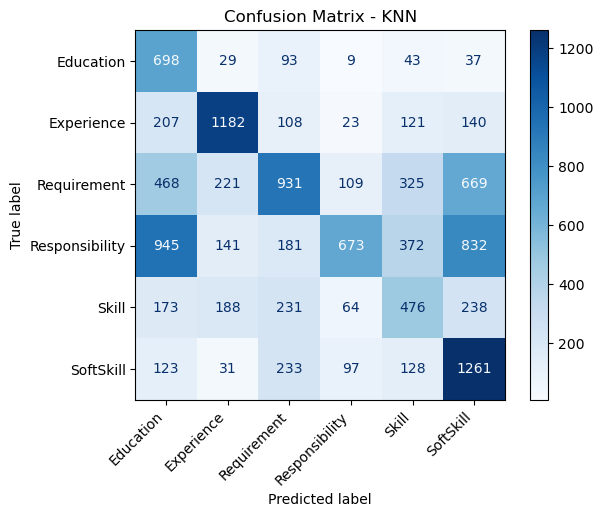

In [26]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=label_encoder.classes_)
disp_knn.plot(cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xticks(rotation=45, ha='right')
plt.show()

#### SVM

In [7]:
# Inisialisasi model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

In [8]:
# Evaluasi model SVM
train_accuracy_svm = accuracy_score(y_train, svm_model.predict(X_train))
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [9]:
print(f"SVM - Akurasi Training: {train_accuracy_svm*100:.2f}% | Akurasi Test: {test_accuracy_svm*100:.2f}%")

SVM - Akurasi Training: 80.59% | Akurasi Test: 75.63%


In [10]:
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       909
           1       0.97      0.90      0.93      1781
           2       0.61      0.68      0.64      2723
           3       0.86      0.89      0.88      3144
           4       0.64      0.51      0.57      1370
           5       0.68      0.69      0.69      1873

    accuracy                           0.76     11800
   macro avg       0.76      0.74      0.75     11800
weighted avg       0.76      0.76      0.76     11800



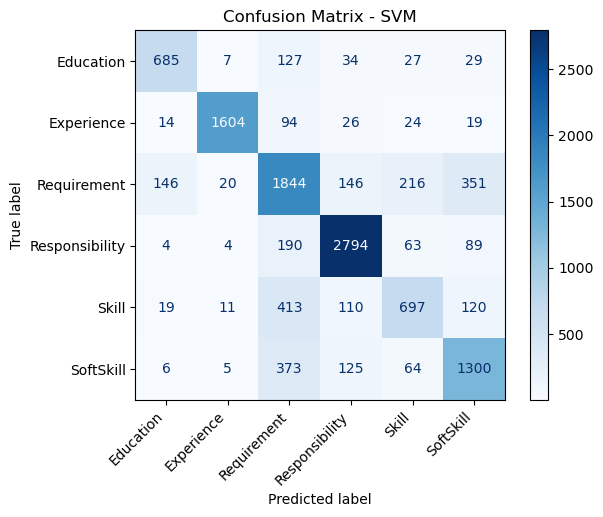

In [11]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=label_encoder.classes_)
disp_svm.plot(cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Naive Bayes

In [10]:
# Karena MultinomialNB tidak bisa menangani nilai negatif dalam data inputnya, maka perlu dilakukan normalisasi terlebih dahulu
# Normalisasi fitur numerik dengan MinMaxScaler agar semua nilai berada di antara 0 dan 1
scaler = MinMaxScaler()
X_numeric_normalized = scaler.fit_transform(X_numeric)

# Gabungkan kembali data teks TF-IDF dengan numerik yang sudah dinormalisasi
X_combined_fixed = hstack((X_text_1_tfidf, X_text_2_tfidf, X_numeric_normalized))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined_fixed, y_encoded, test_size=0.2, random_state=42)

In [33]:
# Inisialisasi model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

In [34]:
# Evaluasi model Naive Bayes
train_accuracy_nb = accuracy_score(y_train, nb_model.predict(X_train))
test_accuracy_nb = accuracy_score(y_test, y_pred_nb)

In [35]:
print(f"Naive Bayes - Akurasi Training: {train_accuracy_nb*100:.2f}% | Akurasi Test: {test_accuracy_nb*100:.2f}%")

Naive Bayes - Akurasi Training: 69.55% | Akurasi Test: 68.09%


In [36]:
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       909
           1       0.75      0.83      0.79      1781
           2       0.57      0.38      0.45      2723
           3       0.79      0.86      0.83      3144
           4       0.52      0.53      0.52      1370
           5       0.64      0.72      0.68      1873

    accuracy                           0.68     11800
   macro avg       0.66      0.69      0.67     11800
weighted avg       0.67      0.68      0.67     11800



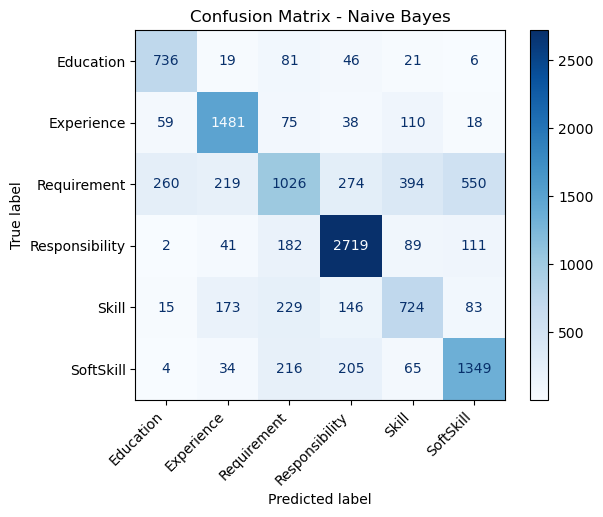

In [37]:
# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=label_encoder.classes_)
disp_nb.plot(cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xticks(rotation=45, ha='right')
plt.show()

### Cross Validation

In [11]:
# Inisialisasi StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#### KNN

In [41]:
# Cross-validation untuk KNN
knn_scores = cross_val_score(knn_model, X_combined, y_encoded, cv=cv, scoring='accuracy')
print(f"KNN Cross-Validation Accuracy: {np.mean(knn_scores)*100:.2f}% ± {np.std(knn_scores)*100:.2f}%")

KNN Cross-Validation Accuracy: 45.27% ± 0.44%


#### SVM

In [42]:
# Cross-validation untuk SVM
svm_scores = cross_val_score(svm_model, X_combined, y_encoded, cv=cv, scoring='accuracy')
print(f"SVM Cross-Validation Accuracy: {np.mean(svm_scores)*100:.2f}% ± {np.std(svm_scores)*100:.2f}%")

SVM Cross-Validation Accuracy: 75.53% ± 0.43%


#### Naive Bayes

In [39]:
# Cross-validation untuk Naive Bayes
nb_scores = cross_val_score(nb_model, X_combined_fixed, y_encoded, cv=cv, scoring='accuracy')
print(f"Naive Bayes Cross-Validation Accuracy: {np.mean(nb_scores)*100:.2f}% ± {np.std(nb_scores)*100:.2f}%")

Naive Bayes Cross-Validation Accuracy: 67.77% ± 0.25%


Note : Persentase yang pertama merupakan akurasi rata-rata dari model. Sedangkan persentase yang kedua merupakan standar deviasi akurasi di setiap lipatan. Semakin kecil nilai ini, semakin konsisten performa model pada berbagai lipatan data.

### Hyperparameter Tuning

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42)

#### KNN

In [17]:
# Hyperparameter tuning for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5, scoring='accuracy', verbose=1)
knn_grid.fit(X_train, y_train)
print("Best KNN Parameters:", knn_grid.best_params_)
print("Best KNN Score:", knn_grid.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best KNN Score: 0.46399307731535766


In [18]:
# After finding the best hyperparameters, evaluate on test data with best parameters
knn_best = knn_grid.best_estimator_
knn_test_accuracy = knn_best.score(X_test, y_test)
print("KNN Test Accuracy:", knn_test_accuracy)

KNN Test Accuracy: 0.48889830508474574


#### SVM

In [7]:
# Hyperparameter tuning for SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5, scoring='accuracy', verbose=1)
svm_grid.fit(X_train, y_train)
print("Best SVM Parameters:", svm_grid.best_params_)
print("Best SVM Score:", svm_grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Score: 0.7614993351601093


In [8]:
# After finding the best hyperparameters, evaluate on test data with best parameters
svm_best = svm_grid.best_estimator_
svm_test_accuracy = svm_best.score(X_test, y_test)
print("SVM Test Accuracy:", svm_test_accuracy)

SVM Test Accuracy: 0.7653389830508475


#### Naive Bayes

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_combined_fixed, y_encoded, test_size=0.2, random_state=42)

In [12]:
# Hyperparameter tuning for Naive Bayes
nb_param_grid = {
    'alpha': [0.1, 0.5, 1.0],
}
nb_grid = GridSearchCV(MultinomialNB(), nb_param_grid, cv=5, scoring='accuracy', verbose=1)
nb_grid.fit(X_train, y_train)
print("Best Naive Bayes Parameters:", nb_grid.best_params_)
print("Best Naive Bayes Score:", nb_grid.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Naive Bayes Parameters: {'alpha': 1.0}
Best Naive Bayes Score: 0.6791459141750509


In [ ]:
# After finding the best hyperparameters, evaluate on test data with best parameters
nb_best = nb_grid.best_estimator_
nb_test_accuracy = nb_best.score(X_test, y_test)
print("Naive Bayes Test Accuracy:", nb_test_accuracy)

Naive Bayes Test Accuracy: 0.6809322033898305


# Feature Importance

Top 10 Fitur dengan Koefisien Terbesar:
        Feature  Coefficient
1950         we     1.213702
2449     course     1.100155
504      degree     0.999519
448      course     0.976283
987          is     0.969005
2835   graduate     0.956696
827    graduate     0.932536
2830       good     0.912683
3022  knowledge     0.889826
388    computer     0.859910


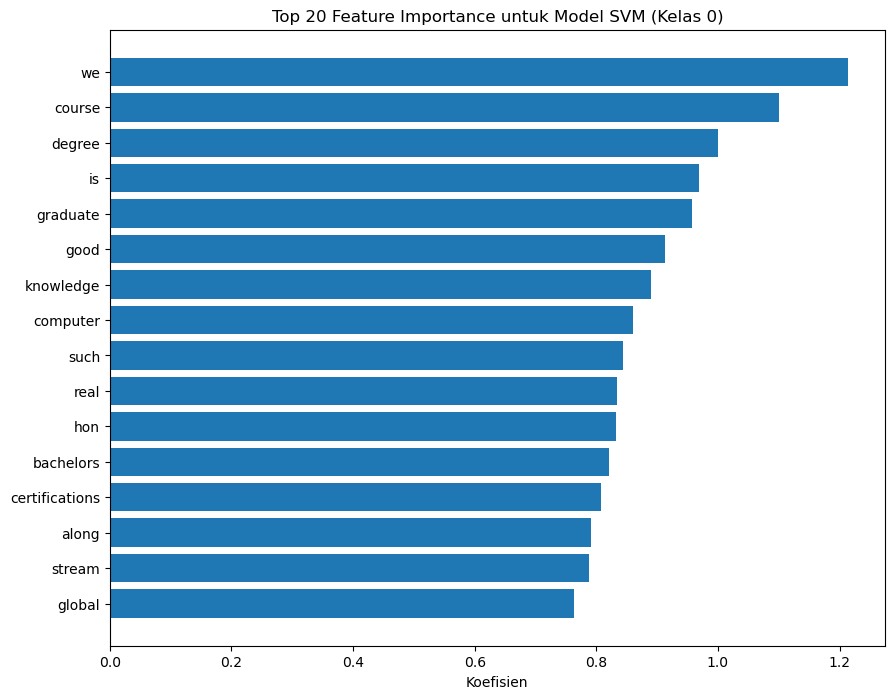

In [17]:
# Pilih indeks kelas untuk analisis
class_index = 0 # Ganti sesuai kebutuhan
coefficients = svm_model.coef_[class_index].toarray().flatten()

# Gabungkan nama fitur
feature_names_text_1 = tfidf_1.get_feature_names_out()
feature_names_text_2 = tfidf_2.get_feature_names_out()
feature_names = np.concatenate([feature_names_text_1, feature_names_text_2, X_numeric.columns])

# Gabungkan koefisien dengan nama fitur
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Urutkan berdasarkan koefisien
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Tampilkan 10 fitur teratas
print("Top 10 Fitur dengan Koefisien Terbesar:")
print(feature_importance.head(10))

# Visualisasi feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'][:20], feature_importance['Coefficient'][:20])  # Top 20 fitur
plt.xlabel('Koefisien')
plt.title(f'Top 20 Feature Importance untuk Model SVM (Kelas {class_index})')
plt.gca().invert_yaxis()
plt.show()

### Summary of Insights and Action Items:

Insight 1: Kata-kata seperti "we", "course", "degree", dan "graduate" menunjukkan bahwa kualifikasi pendidikan dan kursus yang relevan sangat penting dalam keputusan penerimaan pelamar.

Action Item: Fokuskan pencarian pelamar pada mereka yang memiliki gelar pendidikan atau kursus relevan dengan pekerjaan yang dilamar.

Insight 2: Sentimen positif, yang ditunjukkan dengan kata seperti "good", bisa menunjukkan pelamar dengan tingkat kepercayaan diri tinggi atau kualitas yang dihargai.

Action Item: Berikan perhatian lebih pada pelamar yang menunjukkan sentimen positif dalam komunikasi mereka, baik dalam aplikasi maupun wawancara.

Insight 3: Kata-kata yang berhubungan dengan pengetahuan (seperti "knowledge" dan "computer") menunjukkan bahwa keahlian teknis dan kemampuan intelektual sangat berpengaruh dalam keputusan penerimaan.

Action Item: Prioritaskan pelamar yang memiliki pengetahuan teknis atau keterampilan komputer yang relevan dengan posisi yang dibuka.

Final Thought
Secara keseluruhan, hasil ini memberi kita gambaran bahwa kualifikasi pendidikan, keahlian teknis, dan sentimen positif sangat berpengaruh terhadap keputusan penerimaan pelamar dalam rekrutmen. Langkah selanjutnya adalah menyesuaikan proses seleksi untuk lebih memprioritaskan pelamar yang memiliki ciri-ciri ini, serta mengotomatisasi proses screening awal untuk mempermudah seleksi kandidat yang paling cocok.

### Business Insight

Berdasarkan Feature Importance yang dihasilkan oleh model SVM, kita dapat memperoleh wawasan dari fitur-fitur yang berpengaruh besar dalam keputusan penerimaan pelamar atau dalam proses rekrutmen. Berikut beberapa insight yang mungkin muncul:

1. Pentingnya Fitur Kualifikasi Pelamar (Misalnya, Pendidikan, Pengalaman, Skill)
   
Fitur terkait kualifikasi (seperti tingkat pendidikan, pengalaman kerja, atau kemampuan teknis) menunjukkan koefisien positif yang besar, ini berarti fitur-fitur tersebut memiliki pengaruh yang sangat signifikan terhadap keputusan penerimaan pelamar.

Insight 1: Pelamar dengan kualifikasi tinggi (pendidikan yang lebih baik, pengalaman lebih banyak, atau keterampilan yang relevan) lebih mungkin diterima.

2. Kesesuaian Keterampilan dengan Kebutuhan Perusahaan

Fitur keterampilan tertentu (misalnya, keterampilan teknis atau keterampilan tertentu dalam software) menunjukkan koefisien yang signifikan, itu berarti bahwa keterampilan yang relevan sangat mempengaruhi keberhasilan penerimaan pelamar.

Insight 2: Pelamar yang memiliki keterampilan yang lebih sesuai dengan kebutuhan perusahaan atau industri lebih besar kemungkinannya untuk diterima.

3. Efektivitas Tim Rekrutmen
   
Fitur yang berkaitan dengan peran tim rekrutmen, seperti pengalaman atau profesionalisme tim rekrutmen, memiliki pengaruh besar, ini menunjukkan bahwa kemampuan tim rekrutmen mempengaruhi hasil penerimaan pelamar.

Insight 3: Pengalaman dan kemampuan tim rekrutmen sangat penting dalam mempengaruhi hasil akhir rekrutmen.

### Rekomendasi Insight

Berikut adalah langkah-langkah action items yang lebih terfokus pada metriks bisnis:

a. Number of Applicants Accepted (Jumlah Pelamar yang Diterima):

Action Items:

Optimalisasi Proses Seleksi: Dengan mengidentifikasi faktor-faktor seperti kualifikasi dan keterampilan sebagai fitur terpenting, fokuskan pada automasi seleksi berdasarkan kriteria ini untuk meminimalkan human error dan memastikan hanya pelamar yang memenuhi standar yang diproses lebih lanjut.
Penyempurnaan Profil Kandidat: Gunakan data kualifikasi untuk menyesuaikan lowongan pekerjaan agar dapat menarik pelamar yang lebih berkualitas dan memiliki peluang lebih tinggi untuk diterima.

b. Key Performance Indicator (KPI):

Action Items:

Peningkatan KPI Rekrutmen: Fokus pada waktu pemrosesan dan kecepatan rekrutmen. Jika proses rekrutmen masih memakan waktu lama, gunakan analisis sentimen untuk memahami apakah pelamar merasa prosesnya memakan waktu terlalu lama dan otomatisasi tahap-tahap tertentu.
Set KPI untuk Automasi: Tentukan KPI untuk pengurangan waktu evaluasi pelamar (misalnya, mengurangi waktu wawancara dan tes) dan peningkatan tingkat penerimaan berdasarkan data kualifikasi yang lebih preskriptif.

c. Efisiensi Rekrutmen Karyawan (Proses yang biasanya memakan waktu hingga 1 minggu, dapat diselesaikan dalam 2-3 hari):

Action Items:

Implementasi Teknologi Rekrutmen: Gunakan alat otomatisasi seperti video interview otomatis, AI screening tools, dan penjadwalan otomatis untuk mengurangi waktu yang dibutuhkan untuk menyeleksi pelamar.
Penggunaan Tes Kemampuan Otomatis: Implementasikan tes yang otomatis memberikan hasil dalam beberapa menit, dibandingkan dengan metode tradisional yang memakan waktu lebih lama.
Review dan Penyederhanaan Proses Rekrutmen: Identifikasi setiap tahapan dalam proses rekrutmen yang bisa dipercepat tanpa mengorbankan kualitas seleksi.


### Kesimpulan

Dengan memanfaatkan Feature Importance dari model SVM, kita bisa mendapatkan wawasan yang sangat berharga terkait proses rekrutmen. Beberapa business insights yang dapat diperoleh adalah tentang pengaruh kualifikasi, keterampilan, waktu respon, dan demografi terhadap penerimaan pelamar. Action items yang dihasilkan dapat membantu organisasi untuk:

1. Meningkatkan jumlah pelamar yang diterima dengan fokus pada kualifikasi dan keterampilan.
2. Meningkatkan KPI rekrutmen dengan fokus pada pengurangan waktu seleksi.
3. Meningkatkan efisiensi rekrutmen dengan mengurangi waktu yang dibutuhkan dalam proses rekrutmen dari 1 minggu menjadi 2-3 hari.

Dengan implementasi strategi ini, proses rekrutmen menjadi lebih efisien dan dapat menghasilkan hasil yang lebih baik sesuai dengan metrik yang diinginkan.